In [4]:
import random
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import pandas as pd
import os

from scipy.stats import norm, skewnorm

In [5]:
def rms(x, axis=None):
    if axis is not None:
        return np.sqrt(np.sum(x**2, axis=axis) / x.shape[axis])
    return np.sqrt(np.sum(x**2) / x.size)
normal_pdf = lambda mu, sigma, x: np.exp(-(x - mu)**2 / (2 * sigma**2))/(np.sqrt(2 * np.pi * sigma**2))

In [199]:
# months = ["Jan", "Mar", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Dec"]
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

In [200]:

zones = ['ISONE CA', 'ME', 'RI', 'VT', 'CT', 'NH', 'SEMASS', 'WCMASS', 'NEMASSBOST']

test_z_scores_dict = dict()
test_z_scores = []

z_scores_dict = dict()
z_scores = []

relative_perfs = pd.DataFrame()
relative = []

folder = ".\\experiments\\vanilla_comp\\"
for fname in os.listdir(folder):
    if fname.endswith("relative_perfs.npy"):
        month = fname[19:22]
        tmp = np.load(os.path.join(folder, fname))
        relative_perfs[month] = tmp
        relative.extend(relative_perfs[month])
    if fname.endswith("test_z_scores.npy"):
        month = fname[19:22]
        test_z_scores_dict[month] = np.load(os.path.join(folder, fname))
        test_z_scores.extend((test_z_scores_dict[month][:, :, 0][0]).tolist())
    elif fname.endswith("z_scores.npy"):
        month = fname[19:22]
        z_scores_dict[month] = np.load(os.path.join(folder, fname))
        z_scores.extend((z_scores_dict[month][:, :, 0][0]).tolist())
zone_names = ['ISONE CA', 'ME', 'RI', 'VT', 'CT', 'NH', 'SEMASS', 'WCMASS', 'NEMASSBOST']
relative_perfs.index = zone_names
relative_perfs = relative_perfs.T
relative_perfs = relative_perfs.loc[months]

In [201]:
relative_perfs["avg"] = relative_perfs.mean(axis=1)
relative_perfs

,ISONE CA,ME,RI,VT,CT,NH,SEMASS,WCMASS,NEMASSBOST,avg
Jan,5.822288,-8.664058,11.688612,12.483537,3.671150,8.409701,18.541819,5.700768,18.177769,8.425732
Feb,1.267584,-16.877809,20.165660,16.594659,13.996692,-7.901946,11.153686,9.601977,13.230541,6.803449
Mar,30.943332,26.869192,34.634260,36.382601,32.964482,34.997652,29.390384,22.892986,0.182339,27.695248
Apr,20.066409,-43.609571,24.690598,41.066698,22.330931,25.337841,31.931187,31.063095,21.681848,19.395448
May,20.579136,8.645902,12.878658,44.515391,11.222106,22.426953,24.675967,19.052929,19.871974,20.429891
Jun,17.358580,19.008196,22.837945,23.681359,23.661812,19.321160,14.520881,14.550569,6.990514,17.992335
Jul,23.033844,36.238045,19.618968,29.348120,30.907692,28.357996,16.843890,15.440025,16.618844,24.045269
Aug,15.571513,33.741951,19.352477,24.764437,24.706669,24.022076,23.355411,1.268775,12.845849,19.958795
Sep,-0.613025,-6.162494,6.660775,17.940334,2.329764,4.427154,1.713599,1.023125,2.593878,3.323679
Oct,13.272820,11.893735,7.487998,30.632169,13.170353,22.427638,23.645243,20.248682,16.313423,17.676896


In [207]:
relative = relative_perfs[zone_names].values
relative = relative.reshape(relative.size)
relative

array([  5.82228824,  -8.66405786,  11.68861194,  12.48353732,
         3.67115048,   8.40970116,  18.541819  ,   5.70076841,
        18.17776942,   1.26758374, -16.87780895,  20.1656604 ,
        16.59465941,  13.99669211,  -7.90194576,  11.1536861 ,
         9.60197728,  13.23054069,  30.94333193,  26.8691924 ,
        34.63426026,  36.38260084,  32.96448156,  34.99765202,
        29.39038396,  22.89298647,   0.18233853,  20.0664092 ,
       -43.60957071,  24.69059756,  41.06669785,  22.33093143,
        25.33784054,  31.93118703,  31.06309465,  21.68184803,
        20.57913575,   8.6459025 ,  12.87865788,  44.51539057,
        11.22210592,  22.4269531 ,  24.67596736,  19.05292872,
        19.87197434,  17.35857963,  19.0081958 ,  22.83794493,
        23.68135903,  23.66181218,  19.32116003,  14.52088064,
        14.55056886,   6.99051382,  23.03384395,  36.23804493,
        19.61896751,  29.3481198 ,  30.90769188,  28.35799553,
        16.84388954,  15.44002546,  16.61884428,  15.57

In [235]:
# # 95\% confidence interval
# me = np.mean(relative), 
# finite_pop_correction = np.sqrt((12 - 6) / (6 - 1))
# er = np.std(relative_perfs.avg.values, ddof=1) / np.sqrt(6)  # ?
# print(me, 2 * er)
# me - 2 * er, me + 2 * er

In [236]:
n_samples = 100_000
sample_means = np.zeros((n_samples,))
for i in range(n_samples):
    sample_months = np.random.choice(np.arange(12), size=6, replace=False)
    sample = np.array([relative_perfs.avg.loc[months[j]] for j in sample_months])
    sample_means[i] = sample.mean()

In [237]:
me = sample_means.mean()
er = sample_means.std()
print(me, 2 * er)
me - 2 * er, me + 2 * er

15.448152716814112 5.213547798592716


(10.234604918221397, 20.661700515406828)

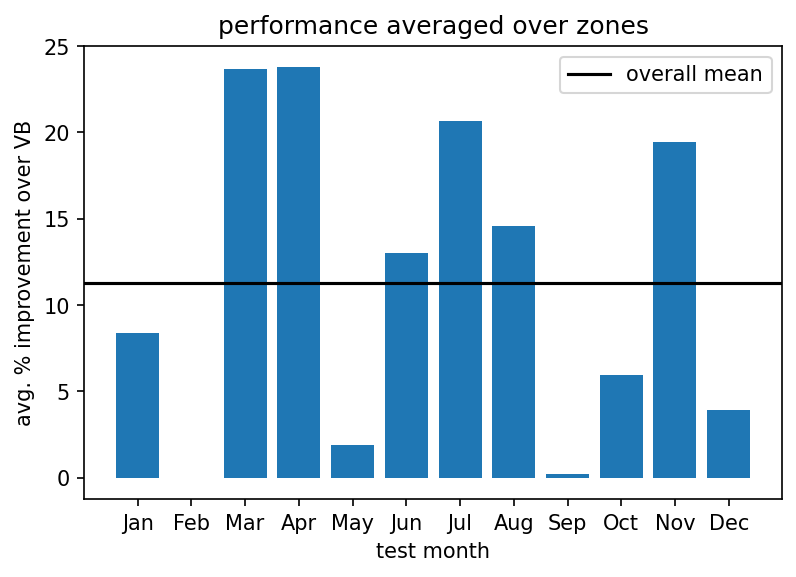

In [10]:
plt.figure(dpi=150)
plt.bar(np.arange(12), relative_perfs.avg, tick_label=relative_perfs.index)
plt.axhline(me, color="k", label="overall mean")
plt.title("performance averaged over zones")
plt.ylabel("avg. % improvement over VB")
plt.xlabel("test month")
plt.legend()

(-0.30935511487652756, 1.2199308014257895)

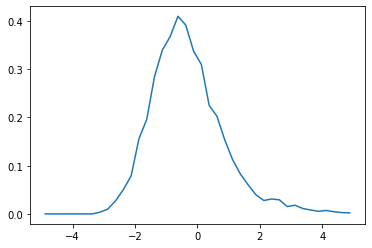

In [11]:
z_hist, bin_edges = np.histogram(test_z_scores, bins=40, range=(-5, 5), density=True)
z_axis = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.plot(z_axis, z_hist, label="Koopman test z-scores")
# plt.plot(z_axis, normal_pdf(0, 1, z_axis), label="Standard Normal Curve")
# plt.title(list(all_data.keys())[i])
np.mean(test_z_scores), np.mean(rms(np.array(test_z_scores)))

In [12]:
mar_z = np.array(test_z_scores_dict["Mar"])
mar_z.std(axis=1)

array([[1.21308564],
       [0.91726423],
       [1.1737755 ],
       [1.45926772],
       [1.20578041],
       [1.20769826],
       [1.19970282],
       [1.27310501],
       [1.28774317]])

(-0.02707384298888987, 0.9737972309432206)

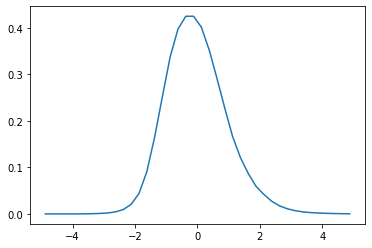

In [13]:
z_hist, bin_edges = np.histogram(z_scores, bins=40, range=(-5, 5), density=True)
z_axis = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.plot(z_axis, z_hist, label="Koopman train z-scores")
# plt.plot(z_axis, normal_pdf(0, 1, z_axis), label="Standard Normal Curve")
# plt.title(list(all_data.keys())[i])
np.mean(z_scores), rms(z_scores)

In [14]:
list(np.mean(test_z_scores_dict[mo]) for mo in relative_perfs.index)

[-0.5742616549665047,
 -0.8931502503227425,
 0.15497558559142474,
 -0.3802324627280704,
 -0.2902479867490024,
 -0.11282195854511021,
 -0.48067210306814695,
 -0.610997502938538,
 -0.05055767952011566,
 -0.3121570583114605,
 -0.16144202399979662,
 0.5644286115598942]

# periodic trends in uncertainty

In [6]:
import json
month_name = "Dec"
zone_name = "VT"

with open("GEFCom2017\\GEFCom2017-Qual\\GEFCom2017QualAll.json") as f:
    all_data = json.loads(f.read())
    
data = np.transpose(np.array([all_data[zone_name]["DEMAND"]], dtype=np.float64))
dates = np.array(list(map(pd.Timestamp, all_data["ISONE CA"]["Date"])))
zones = list(all_data.keys())
print(zones)

month_idx = months.index(month_name)
print("Testing on month", months[month_idx])
test_start_date = pd.Timestamp(f"2017-{month_idx + 1}-01 00:00:00")
test_start = np.argwhere(dates == test_start_date)[0, 0]
test_length = 31 * 24

delay_delta = pd.Timedelta(days=52)
delay = delay_delta.days * 24
train_end_date = test_start_date - delay_delta
train_start_date = train_end_date.replace(year=train_end_date.year - 11)
train_start = np.argwhere(dates == train_start_date)[0, 0]
train_length_delta = train_end_date - train_start_date
train_through = train_length_delta.days * 24
pre_length_delta = train_length_delta * 0.5 # the length of time at the beginning of the trianing period to hide from mu
pre_length = pre_length_delta.days * 24

print("MONTH:", month_name)
data = np.array([all_data[zone_name]["DEMAND"]], dtype=np.float64).T

# rescale data
x_original = data
mean = np.mean(data, axis=0)
rnge = np.max(data, axis=0) - np.min(data, axis=0)
data = (data - np.matlib.repmat(mean, data.shape[0], 1)) / np.matlib.repmat(rnge, data.shape[0], 1)
print("data", data.shape)
predict_through = train_through + delay + test_length
x = data[train_start:][:predict_through]

['ISONE CA', 'ME', 'RI', 'VT', 'CT', 'NH', 'SEMASS', 'WCMASS', 'NEMASSBOST']
Testing on month Dec
MONTH: Dec
data (113952, 1)


In [7]:
folder = ".\\experiments\\periodic_uncertainty\\"
for fname in os.listdir(folder):
    if fname.endswith("test_z_scores.npy"):
        print(fname)
        unc_test_z_scores = np.load(os.path.join(folder, fname))
    elif fname.endswith("z_scores.npy"):
        print(fname)
        unc_z_scores = np.load(os.path.join(folder, fname))
    elif fname.endswith("mu.npy"):
        print(fname)
        mu_hat = np.load(os.path.join(folder, fname))
    elif fname.endswith("sigma.npy"):
        print(fname)
        sigma_hat = np.load(os.path.join(folder, fname))
    elif fname.endswith("alpha.npy"):
        print(fname)
        alpha_hat = np.load(os.path.join(folder, fname))

control_DecVT_train_start=15528_2021-04-13_00.24.59.735103trained15528-96432_alpha.npy
control_DecVT_train_start=15528_2021-04-13_00.24.59.735103trained15528-96432_mu.npy
control_DecVT_train_start=15528_2021-04-13_00.24.59.735103trained15528-96432_sigma.npy
control_DecVT_train_start=15528_2021-04-13_04.12.20.853126test_z_scores.npy
control_DecVT_train_start=15528_2021-04-13_04.12.20.853126z_scores.npy


In [8]:
start = 0
idx = train_through
import time
now = time.time()
quantiles = skewnorm.cdf(x[start:idx], alpha_hat[start:idx], loc=mu_hat[start:idx], scale=sigma_hat[start:idx])
deskewed_z_scores = norm.ppf(quantiles)
print(time.time() - now)

56.40386605262756


In [11]:
z_hist, bin_edges = np.histogram(deskewed_z_scores, bins=40, range=(-5, 5), density=True)
z_axis = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.plot(z_axis, z_hist, label="Koopman train z-scores")
plt.plot(z_axis, norm.pdf(z_axis), label="Standard Normal Curve")
np.mean(deskewed_z_scores), rms(deskewed_z_scores)

(inf, inf)

<IPython.core.display.Javascript object>


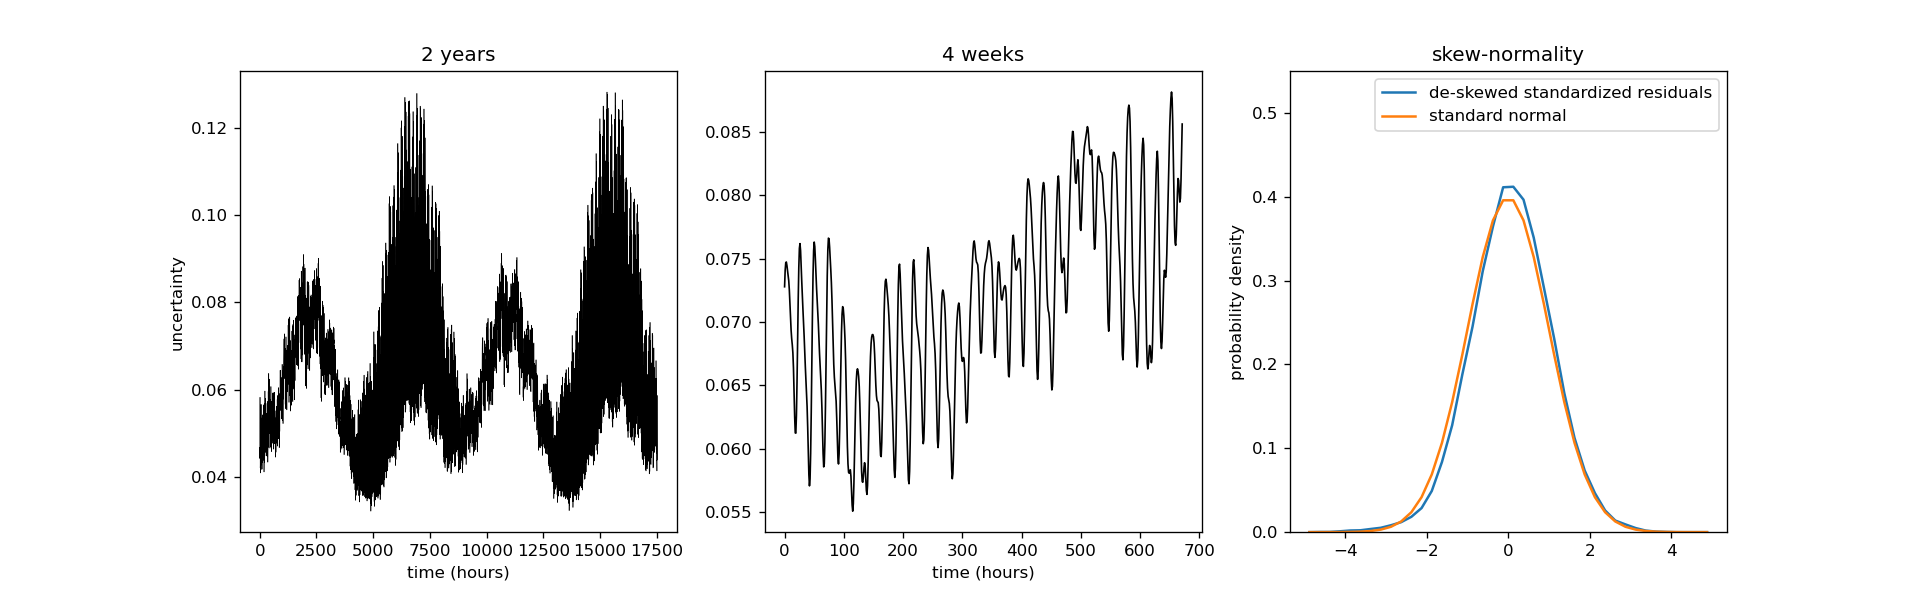

In [12]:
%matplotlib notebook
std_hat = skewnorm.std(alpha_hat, loc=mu_hat, scale=sigma_hat)
plt.subplots(figsize=(16, 5))
plt.subplot(131)
plt.title("2 years")
plt.plot(std_hat[:8760 * 2], linewidth=0.35, color="k")
plt.ylabel("uncertainty")
plt.xlabel("time (hours)")
plt.subplot(132)
plt.title("4 weeks")
st = 0
plt.plot(np.arange(st, st + 4 * 168), std_hat[delay + st:delay + st + 4 * 168], linewidth=1, color="k")
plt.xlabel("time (hours)")
plt.subplot(133)
plt.plot(z_axis, z_hist, label="de-skewed standardized residuals")
plt.plot(z_axis, norm.pdf(z_axis), label="standard normal")
plt.title("skew-normality")
plt.ylabel("probability density")
plt.ylim([0, 0.55])
plt.legend()

# NASA atmospheric chemistry comparison

### Pinball Loss

In [188]:
import json
with open(".\\atmo_chem\\NASAcomparison.json") as f:
    NASAcomparison = json.loads(f.read())
NASAcomparison

{'Station0004436': {'NO2': {'koopman': {'pinball': 0.0216650459421217,
    'nmb': -0.017596977006651214,
    'nrmse': 0.33004161332837645,
    'correlation': 0.251969212499101},
   'NASA': {'pinball': 0.040262643344070495,
    'nmb': 0.6470942073080698,
    'nrmse': 0.5518554636262638,
    'correlation': 0.172517941537615}},
  'O3': {'koopman': {'pinball': 0.04777866948338766,
    'nmb': 0.06474254457134208,
    'nrmse': 0.35243628643838604,
    'correlation': 0.539279853696767},
   'NASA': {'pinball': 0.05788467546041508,
    'nmb': 0.012311903988272801,
    'nrmse': 0.30525200611129194,
    'correlation': 0.524858715375988}},
  'PM25': {'koopman': {'pinball': 0.09319310875267511,
    'nmb': 0.21195505075221202,
    'nrmse': 0.44498575082134145,
    'correlation': 0.02003910907627966},
   'NASA': {'pinball': 0.5031557277953198,
    'nmb': 3.4309453304887714,
    'nrmse': 2.1170423517965777,
    'correlation': 0.2794910966870648}}},
 'Station0000036': {'NO2': {'koopman': {}, 'NASA': {}

EEA_DE_DE_DENW329 NO2 was NaN
EEA_ES_ES1076A NO2 was NaN
EEA_ES_ES1076A O3 was NaN
EEA_FR_FR12021 NO2 was NaN
EEA_FR_FR12021 O3 was NaN
EEA_FR_FR33101 NO2 was NaN
EEA_FR_FR33101 O3 was NaN
EEA_IS_IS0053A NO2 was NaN
JPN_Tokyo_13117520 PM25 was NaN
TODO remove

In [189]:
len(NASAcomparison)

50

investigate further: 
Station0000065
Station0000478
Station0000621

In [190]:
pinball = pd.DataFrame({"koopman": {"NO2": [], "O3": [], "PM25": []}, "NASA": {"NO2": [], "O3": [], "PM25": []}})
nmb = pd.DataFrame({"koopman": {"NO2": [], "O3": [], "PM25": []}, "NASA": {"NO2": [], "O3": [], "PM25": []}})
nrmse = pd.DataFrame({"koopman": {"NO2": [], "O3": [], "PM25": []}, "NASA": {"NO2": [], "O3": [], "PM25": []}})
correlation = pd.DataFrame({"koopman": {"NO2": [], "O3": [], "PM25": []}, "NASA": {"NO2": [], "O3": [], "PM25": []}})
pinball_means = pd.DataFrame({"koopman": {"NO2": [], "O3": [], "PM25": []}, "NASA": {"NO2": [], "O3": [], "PM25": []}})
chem_names = ["NO$_2$", "O$_3$", "PM$_{2.5}$"]

for station in NASAcomparison:
    """Comparisons on stations 478 and 621 are excluded because there were no observations from the last 9 months of the training year."""
    if station not in ["Station0000478", "Station0000621"]:
        for chemical in ["NO2", "O3", "PM25"]:
            if NASAcomparison[station][chemical]["koopman"] != {}: # make sure data was there
                if np.isfinite(NASAcomparison[station][chemical]["koopman"]["pinball"]):
                    pinball["koopman"][chemical].append(NASAcomparison[station][chemical]["koopman"]["pinball"])
                    pinball["NASA"][chemical].append(NASAcomparison[station][chemical]["NASA"]["pinball"])
                    nmb["koopman"][chemical].append(NASAcomparison[station][chemical]["koopman"]["nmb"])
                    nmb["NASA"][chemical].append(NASAcomparison[station][chemical]["NASA"]["nmb"])
                    nrmse["koopman"][chemical].append(NASAcomparison[station][chemical]["koopman"]["nrmse"])
                    nrmse["NASA"][chemical].append(NASAcomparison[station][chemical]["NASA"]["nrmse"])
                    correlation["koopman"][chemical].append(NASAcomparison[station][chemical]["koopman"]["correlation"])
                    correlation["NASA"][chemical].append(NASAcomparison[station][chemical]["NASA"]["correlation"])
                else:
                    print(station + " " + chemical + " was NaN")


In [191]:
station, len(station)

('JPN_Tokyo_13117520', 18)

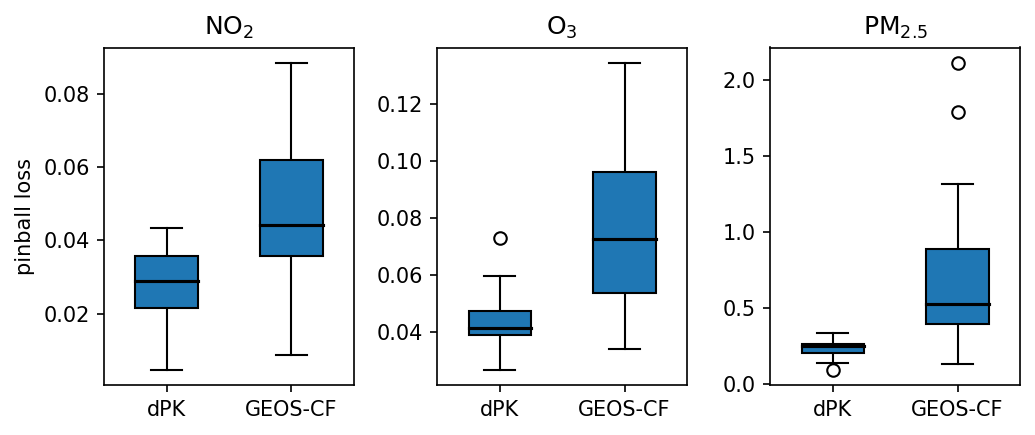

In [197]:
plt.subplots(figsize=(7, 3), dpi=150)
for i, chem in enumerate(pinball.index[::-1]):
    plt.subplot(1, 3, 3 - i)
    for col in pinball.columns:
        p = np.array(pinball[col][chem])
        pinball[col][chem] = p
        pinball_means[col][chem] = p.mean()
    plt.boxplot(pinball.loc[chem], widths=[0.5, 0.5], showfliers=True, patch_artist=True, labels=["dPK", "GEOS-CF"], medianprops={"linewidth":1.5, "color":'k'})
    plt.title(chem_names[2 - i])
plt.ylabel("pinball loss")
plt.tight_layout()

In [193]:
pinball_means

,koopman,NASA
NO2,0.028619,0.048171
O3,0.042710,0.074578
PM25,0.235174,0.704829


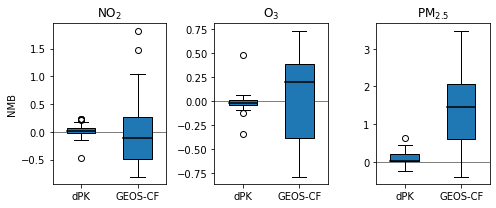

In [194]:
plt.subplots(figsize=(7, 3))
for i, chem in enumerate(nmb.index[::-1]):
    plt.subplot(1, 3, 3 - i)
    for col in nmb.columns:
        p = np.array(nmb[col][chem])
        nmb[col][chem] = p
    plt.boxplot(nmb.loc[chem], widths=[0.5, 0.5], showfliers=True, patch_artist=True, labels=["dPK", "GEOS-CF"], medianprops={"linewidth":1.5, "color":'k'})
    plt.title(chem_names[2 - i])
    plt.axhline(0, color="k", linewidth=0.5)
plt.ylabel("NMB")
plt.tight_layout()

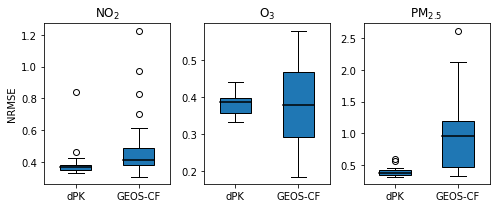

In [195]:
plt.subplots(figsize=(7, 3))
for i, chem in enumerate(nrmse.index[::-1]):
    plt.subplot(1, 3, 3 - i)
    for col in nrmse.columns:
        p = np.array(nrmse[col][chem])
        nrmse[col][chem] = p
    plt.boxplot(nrmse.loc[chem], widths=[0.5, 0.5], showfliers=True, patch_artist=True, labels=["dPK", "GEOS-CF"], medianprops={"linewidth":1.5, "color":'k'})
    plt.title(chem_names[2 - i])
plt.ylabel("NRMSE")
plt.tight_layout()

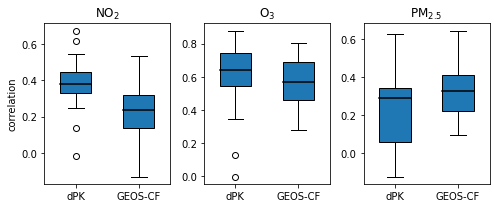

In [196]:
plt.subplots(figsize=(7, 3))
for i, chem in enumerate(correlation.index[::-1]):
    plt.subplot(1, 3, 3 - i)
    for col in correlation.columns:
        p = np.array(correlation[col][chem])
        correlation[col][chem] = p
    plt.boxplot(correlation.loc[chem], widths=[0.5, 0.5], showfliers=True, patch_artist=True, labels=["dPK", "GEOS-CF"], medianprops={"linewidth":1.5, "color":'k'})
    plt.title(chem_names[2 - i])
plt.ylabel("correlation")
plt.tight_layout()